# Test - New houses are expensive than old ones

## H0

House squaremeter price and build year are independent

## H1

House squaremeter price and build year are dependent

In [2]:
import pandas as pd

In [3]:
from statsmodels.stats.proportion import proportions_chisquare

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [7]:
data = pd.read_csv('house_prices_fixed.csv',decimal=',')

In [8]:
data.head(10)

,address,area,date,demanded_price,final_price,monthly_fee,operating_cost,price_per_squaremeter,room_number,title,url,year_of_construction
0,Luxgatan 7,30.0,13/01/21,2350000,2550000,1733,6096.0,85000,1 rum,Luxgatan 7 - Sald - Lilla Essingen \\\\ Kungs...,https://www.hemnet.se/salda/lagenhet-1rum-lill...,1937
1,"Primusgatan 108, 6/6 tr",101.0,10/01/21,11400000,11400000,5887,5540.0,112871,4 rum,"Primusgatan 108, 6/6 tr - Sald - Kungsholmen ...",https://www.hemnet.se/salda/lagenhet-4rum-kung...,1935
2,"Stralgatan 47, 3 tr",31.0,08/01/21,2595000,2875000,2471,3200.0,92742,2 rum,"Stralgatan 47, 3 tr - Sald - Lilla Essingen ...",https://www.hemnet.se/salda/lagenhet-2rum-lill...,1939
3,Disponentgatan 1,46.0,08/01/21,3550000,3550000,3003,12979.0,77174,"2,5 rum","Disponentgatan 1 - Sald - Lilla Essingen, STO...","https://www.hemnet.se/salda/lagenhet-2,5rum-li...",1935
4,Essinge Brogata 12,34.5,08/01/21,2495000,2900000,2162,4200.0,84058,2 rum,Essinge Brogata 12 - Sald - Kungsholmen - Lil...,https://www.hemnet.se/salda/lagenhet-2rum-kung...,1934
5,"Essinge Brogata 39, 2 tr",23.0,14/12/20,1895000,2205000,1787,3600.0,95870,1 rum,"Essinge Brogata 39, 2 tr - Sald - Lilla Essi...",https://www.hemnet.se/salda/lagenhet-1rum-lill...,1938
6,Stralgatan 47,40.0,11/12/20,2595000,2850000,2957,4860.0,71250,2 rum,Stralgatan 47 - Sald - Lilla Essingen \\\\ Ku...,https://www.hemnet.se/salda/lagenhet-2rum-lill...,1939
7,"Patentgatan 1, 3tr",69.0,04/12/20,5995000,6400000,3778,7200.0,92754,3 rum,"Patentgatan 1, 3tr - Sald - Lilla Essingen, S...",https://www.hemnet.se/salda/lagenhet-3rum-lill...,2006
8,"Primusgatan 82, 6tr",84.5,03/12/20,8495000,8495000,4828,7800.0,100533,3 rum,"Primusgatan 82, 6tr - Sald - Lilla Essingen, ...",https://www.hemnet.se/salda/lagenhet-3rum-lill...,2004
9,"Primusgatan 81, van 4",96.0,01/12/20,8495000,9250000,4793,6860.0,96354,4 rum,"Primusgatan 81, van 4 - Sald - Lilla Essingen...",https://www.hemnet.se/salda/lagenhet-4rum-lill...,2004


In [9]:
data['price_per_squaremeter'].describe()

count       236.000000
mean      83405.406780
std       11409.892666
min       56875.000000
25%       75826.000000
50%       81936.500000
75%       90828.000000
max      127727.000000
Name: price_per_squaremeter, dtype: float64

### if value is bigger than mean it is expensive

In [10]:
data['price_category'] = list(map(lambda x: 'expensive' if x > 83405 else 'cheap',data['price_per_squaremeter']))

In [11]:
data['year_of_construction'].describe()

count     236.000000
mean     1959.559322
std        32.012376
min      1909.000000
25%      1938.000000
50%      1939.000000
75%      2004.000000
max      2007.000000
Name: year_of_construction, dtype: float64

### if value is bigger than 1960 it is new

In [12]:
data['years_category'] = list(map(lambda x: 'new' if x > 1960 else 'old',data['year_of_construction']))

In [13]:
data.head(10)

,address,area,date,demanded_price,final_price,monthly_fee,operating_cost,price_per_squaremeter,room_number,title,url,year_of_construction,price_category,years_category
0,Luxgatan 7,30.0,13/01/21,2350000,2550000,1733,6096.0,85000,1 rum,Luxgatan 7 - Sald - Lilla Essingen \\\\ Kungs...,https://www.hemnet.se/salda/lagenhet-1rum-lill...,1937,expensive,old
1,"Primusgatan 108, 6/6 tr",101.0,10/01/21,11400000,11400000,5887,5540.0,112871,4 rum,"Primusgatan 108, 6/6 tr - Sald - Kungsholmen ...",https://www.hemnet.se/salda/lagenhet-4rum-kung...,1935,expensive,old
2,"Stralgatan 47, 3 tr",31.0,08/01/21,2595000,2875000,2471,3200.0,92742,2 rum,"Stralgatan 47, 3 tr - Sald - Lilla Essingen ...",https://www.hemnet.se/salda/lagenhet-2rum-lill...,1939,expensive,old
3,Disponentgatan 1,46.0,08/01/21,3550000,3550000,3003,12979.0,77174,"2,5 rum","Disponentgatan 1 - Sald - Lilla Essingen, STO...","https://www.hemnet.se/salda/lagenhet-2,5rum-li...",1935,cheap,old
4,Essinge Brogata 12,34.5,08/01/21,2495000,2900000,2162,4200.0,84058,2 rum,Essinge Brogata 12 - Sald - Kungsholmen - Lil...,https://www.hemnet.se/salda/lagenhet-2rum-kung...,1934,expensive,old
5,"Essinge Brogata 39, 2 tr",23.0,14/12/20,1895000,2205000,1787,3600.0,95870,1 rum,"Essinge Brogata 39, 2 tr - Sald - Lilla Essi...",https://www.hemnet.se/salda/lagenhet-1rum-lill...,1938,expensive,old
6,Stralgatan 47,40.0,11/12/20,2595000,2850000,2957,4860.0,71250,2 rum,Stralgatan 47 - Sald - Lilla Essingen \\\\ Ku...,https://www.hemnet.se/salda/lagenhet-2rum-lill...,1939,cheap,old
7,"Patentgatan 1, 3tr",69.0,04/12/20,5995000,6400000,3778,7200.0,92754,3 rum,"Patentgatan 1, 3tr - Sald - Lilla Essingen, S...",https://www.hemnet.se/salda/lagenhet-3rum-lill...,2006,expensive,new
8,"Primusgatan 82, 6tr",84.5,03/12/20,8495000,8495000,4828,7800.0,100533,3 rum,"Primusgatan 82, 6tr - Sald - Lilla Essingen, ...",https://www.hemnet.se/salda/lagenhet-3rum-lill...,2004,expensive,new
9,"Primusgatan 81, van 4",96.0,01/12/20,8495000,9250000,4793,6860.0,96354,4 rum,"Primusgatan 81, van 4 - Sald - Lilla Essingen...",https://www.hemnet.se/salda/lagenhet-4rum-lill...,2004,expensive,new


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   address                236 non-null    object 
 1   area                   236 non-null    float64
 2   date                   236 non-null    object 
 3   demanded_price         236 non-null    int64  
 4   final_price            236 non-null    int64  
 5   monthly_fee            236 non-null    int64  
 6   operating_cost         205 non-null    float64
 7   price_per_squaremeter  236 non-null    int64  
 8   room_number            236 non-null    object 
 9   title                  236 non-null    object 
 10  url                    236 non-null    object 
 11  year_of_construction   236 non-null    int64  
 12  price_category         236 non-null    object 
 13  years_category         236 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 25.9+ KB


In [15]:
data.dtypes

address                   object
area                     float64
date                      object
demanded_price             int64
final_price                int64
monthly_fee                int64
operating_cost           float64
price_per_squaremeter      int64
room_number               object
title                     object
url                       object
year_of_construction       int64
price_category            object
years_category            object
dtype: object

In [16]:
data_crosstab = pd.crosstab(data['price_category'], data['years_category'],  margins = False)

In [17]:
data_crosstab

years_category,new,old
price_category,,
cheap,50,83
expensive,28,75


In [18]:
contigency_pct = pd.crosstab(data['price_category'], data['years_category'], normalize='index')

In [19]:
contigency_pct

years_category,new,old
price_category,,
cheap,0.375940,0.624060
expensive,0.271845,0.728155


<AxesSubplot:xlabel='years_category', ylabel='price_category'>

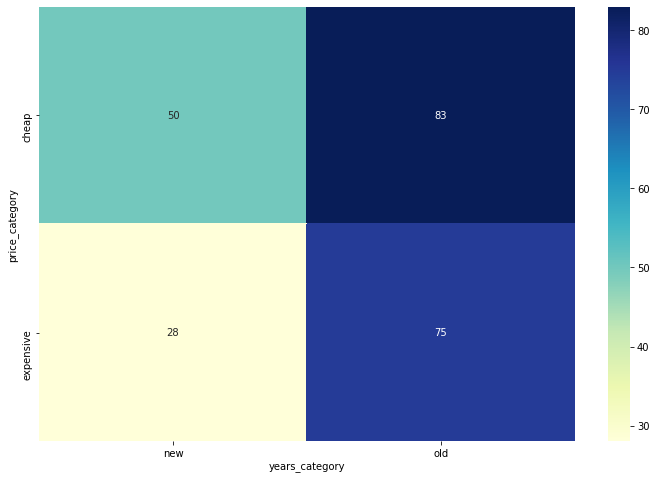

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(data_crosstab, annot=True, cmap="YlGnBu")

In [21]:
stat, p, dof, expected = chi2_contingency(data_crosstab)

In [24]:
p

0.12198940846285086

In [25]:
dof

1

In [26]:
expected

array([[43.95762712, 89.04237288],
       [34.04237288, 68.95762712]])

The p-value is 12.19% which means that we do not reject the null hypothesis at 95% level of confidence. 
The null hypothesis was that House squaremeter price and build year are independent. 

In [28]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Independent (fail to reject H0)


In [29]:
critical

3.841458820694124

In [30]:
stat

2.3915911388211395